In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
411/(1641+411+514)*100

16.01714731098987

In [24]:
simulate = pd.read_csv('./03_Simulated_data/Criteria_2.csv')
result = pd.read_csv('./04_Simulated_result/GP/GP_result_Criteria_2.csv')

annot = simulate.iloc[:,0]
#annot
result = result.iloc[:,1:]
result = result.iloc[:,0:4]

combine = pd.concat([result,annot], axis = 1)
combine

,Period,SNR,nSNR,LLR,0
0,24.0,3.723102,1.384483,0.541378,24
1,12.0,5.398629,2.699314,0.878570,12
2,12.0,8.241838,4.120919,1.291434,12
3,21.0,4.438863,2.088856,0.757709,21
4,15.0,6.203515,3.101758,0.916015,15
...,...,...,...,...,...
195,15.0,5.123548,2.561774,0.014870,15
196,21.0,2.031924,0.794000,0.008959,21
197,21.0,4.130765,1.534916,0.841895,21
198,24.0,3.380377,1.362093,0.318815,24


In [25]:
combine.to_csv('GP_Criteria_2_fixed.csv', index = False)

array([[<Axes: title={'center': 'LLR'}>]], dtype=object)

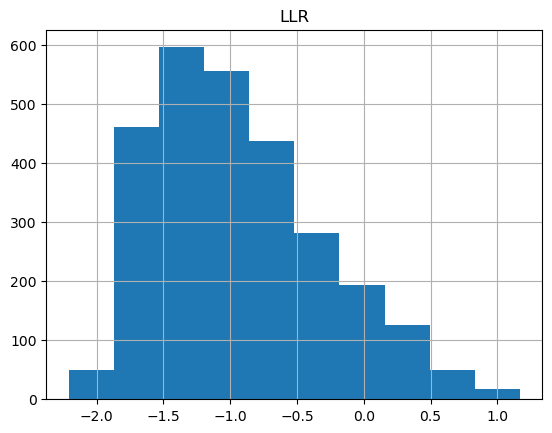

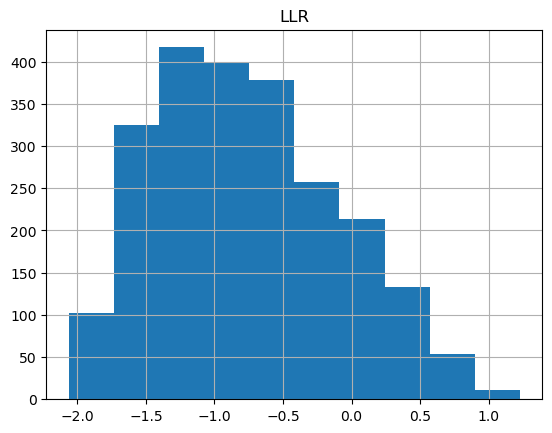

In [2]:
# Period 24
KO = pd.read_csv('./06_XBP1_result/KO/GP_result_KO.csv') #4666/2764/269 (24)   726/0 (12)
KO = KO.iloc[:,1:]

WT = pd.read_csv('./06_XBP1_result/WT/GP_result_WT.csv') #4338/2290/340 (24)   592/5 (12)
WT = WT.iloc[:,1:]

xbp = [KO,WT]
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 24)])
    
circadian_2[0].hist(column='LLR')
circadian_2[1].hist(column='LLR')

array([[<Axes: title={'center': 'SNR'}>]], dtype=object)

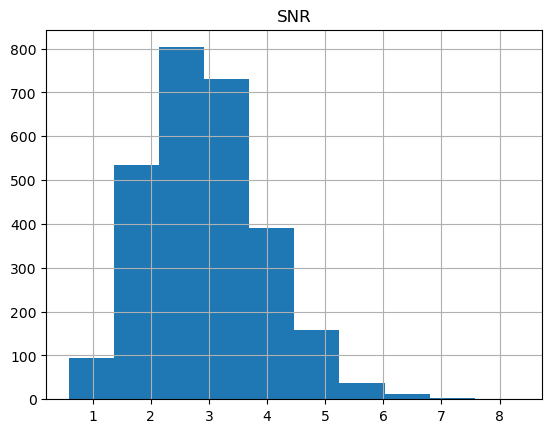

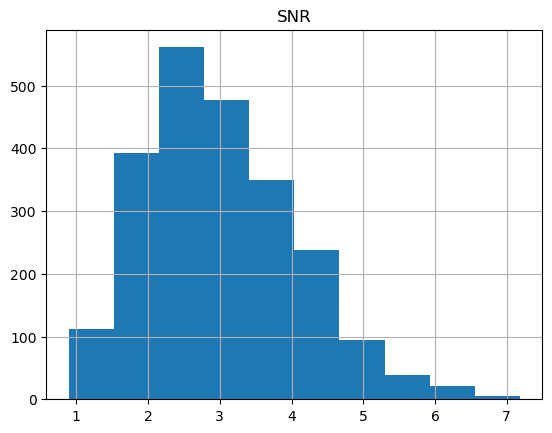

In [3]:
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 24)])
    
circadian_2[0].hist(column='SNR')
circadian_2[1].hist(column='SNR')

array([[<Axes: title={'center': 'nSNR'}>]], dtype=object)

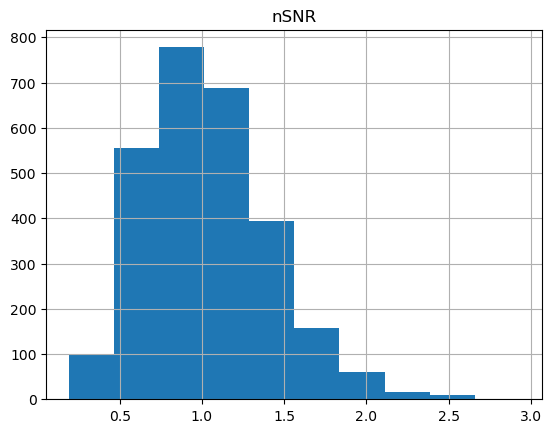

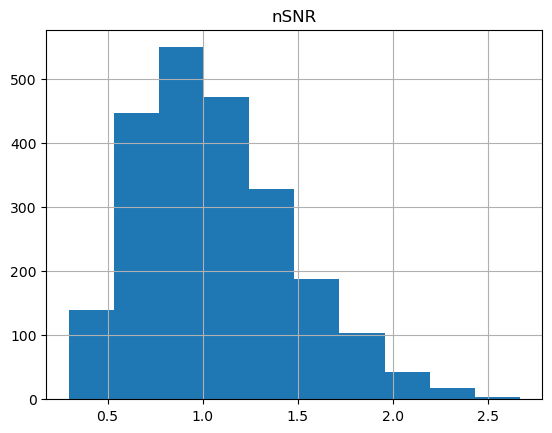

In [4]:
circadian_2 = []
for k in xbp:
    circadian_2.append(k[(k.Period == 24)])
    
circadian_2[0].hist(column='nSNR')
circadian_2[1].hist(column='nSNR')

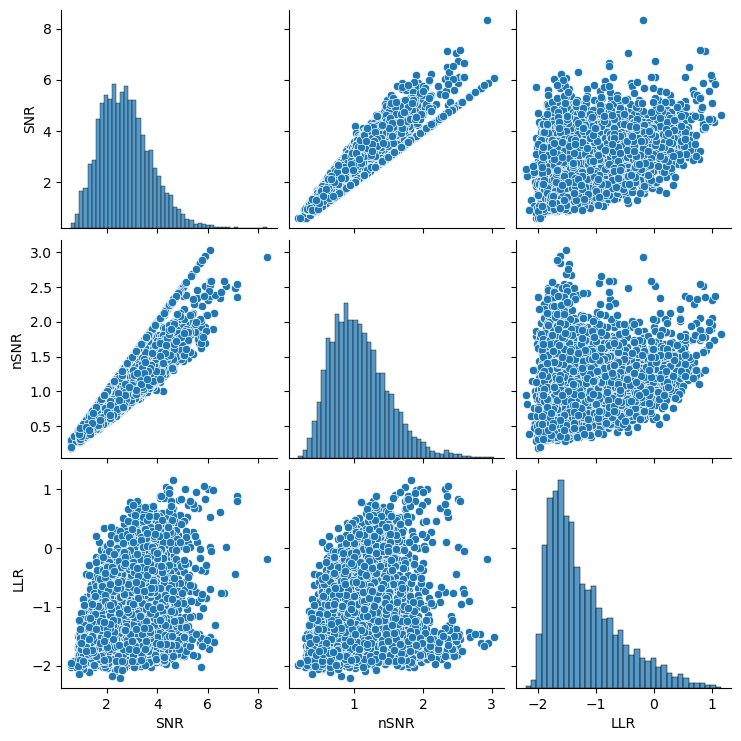

In [5]:
import seaborn as sns

sns.pairplot(KO.iloc[:,2:5])

In [6]:
JTK_WT = pd.read_csv('./JTK_results/JTK_WT.csv')
JTK_WT = JTK_WT.iloc[:,1:]
JTK_KO = pd.read_csv('./JTK_results/JTK_KO.csv')
JTK_KO = JTK_KO.iloc[:,1:]

-1.2943142255147295
-4.5716598032972815


Text(0.5, 1.0, 'LLR vs pvalues in KO')

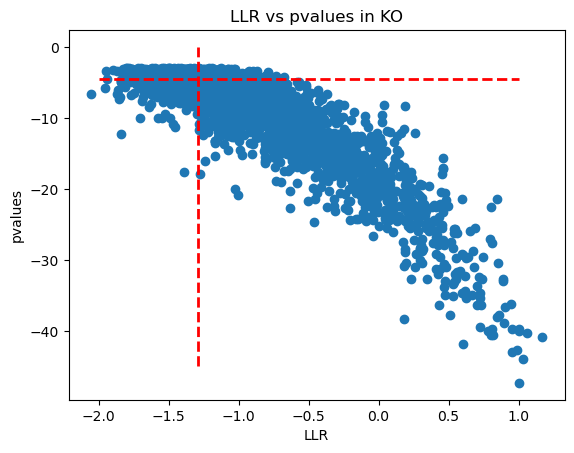

In [7]:
refine = JTK_KO[JTK_KO['ADJ.P'] < 0.05]
llr = sorted(KO['LLR'][refine.index.values], reverse = True)
thres_x = llr[round(len(llr)/100*80)]
pval = sorted(refine['ADJ.P'], reverse = False)
thres_y = pval[round(len(pval)/100*80)] 
print(thres_x)
print(np.log(thres_y))

plt.scatter(x = KO['LLR'][refine.index.values], y = np.log(refine['ADJ.P']))
plt.hlines(y= np.log(thres_y), xmin=-2, xmax=1, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-45, ymax=0, colors='r', linestyles='--', lw=2)
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in KO')

-1.3660812377929688
-4.727255301950393


Text(0.5, 1.0, 'LLR vs pvalues in WT')

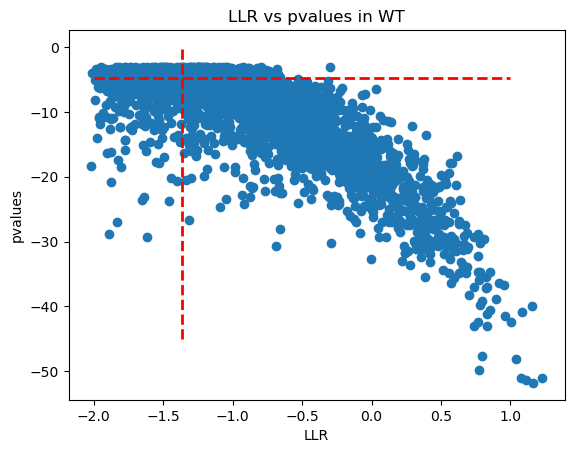

In [8]:
refine = JTK_WT[JTK_WT['ADJ.P'] < 0.05]
llr = sorted(WT['LLR'][refine.index.values], reverse = True)
thres_x = llr[round(len(llr)/100*80)]
pval = sorted(refine['ADJ.P'], reverse = False)
thres_y = pval[round(len(pval)/100*80)] 

print(thres_x)
print(np.log(thres_y))

plt.scatter(x = WT['LLR'][refine.index.values], y = np.log(refine['ADJ.P']))
plt.hlines(y= np.log(thres_y), xmin=-2, xmax=1, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-45, ymax=0, colors='r', linestyles='--', lw=2)
plt.xlabel('LLR')
plt.ylabel('pvalues')
plt.title('LLR vs pvalues in WT')

2.031462546086747
-4.727255301950393


Text(0.5, 1.0, 'SNR vs pvalues in WT')

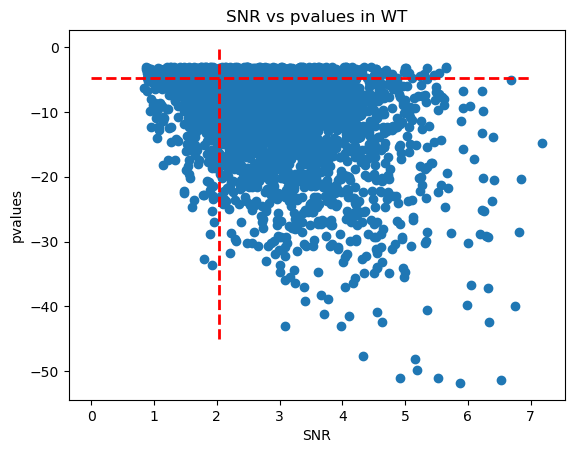

In [9]:
refine = JTK_WT[JTK_WT['ADJ.P'] < 0.05]
snr = sorted(WT['SNR'][refine.index.values], reverse = True)
thres_x = snr[round(len(snr)/100*80)]
pval = sorted(refine['ADJ.P'], reverse = False)
thres_y = pval[round(len(pval)/100*80)] 

print(thres_x)
print(np.log(thres_y))

plt.scatter(x = WT['SNR'][refine.index.values], y = np.log(refine['ADJ.P']))
plt.hlines(y= np.log(thres_y), xmin=0, xmax=7, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-45, ymax=0, colors='r', linestyles='--', lw=2)
plt.xlabel('SNR')
plt.ylabel('pvalues')
plt.title('SNR vs pvalues in WT')

0.7554927052330216
-4.727255301950393


Text(0.5, 1.0, 'nSNR vs pvalues in WT')

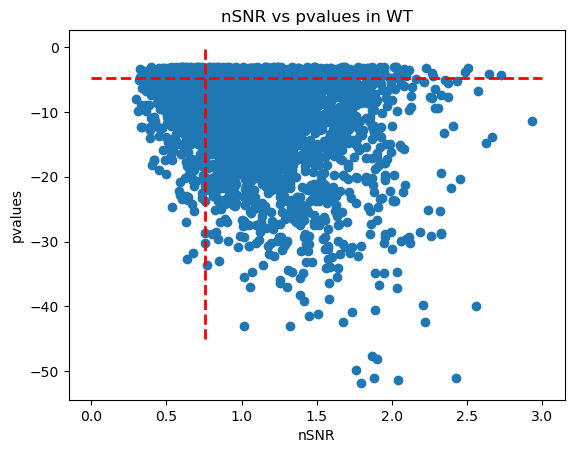

In [10]:
refine = JTK_WT[JTK_WT['ADJ.P'] < 0.05]
snr = sorted(WT['nSNR'][refine.index.values], reverse = True)
thres_x = snr[round(len(snr)/100*80)]
pval = sorted(refine['ADJ.P'], reverse = False)
thres_y = pval[round(len(pval)/100*80)] 

print(thres_x)
print(np.log(thres_y))

plt.scatter(x = WT['nSNR'][refine.index.values], y = np.log(refine['ADJ.P']))
plt.hlines(y= np.log(thres_y), xmin=0, xmax=3, colors='r', linestyles='--', lw=2)
plt.vlines(x= thres_x, ymin=-45, ymax=0, colors='r', linestyles='--', lw=2)
plt.xlabel('nSNR')
plt.ylabel('pvalues')
plt.title('nSNR vs pvalues in WT')

In [44]:
# Plot the confidence plot for simulated results:
s_results = pd.read_csv('./04_Simulated_result/GP/GP_Criteria_2.csv')
s_results = s_results.iloc[:,1:]
s_results
# True positive, define the threshold -> if above accept with that period -> check with ground truth

,Period,SNR,nSNR,LLR,0
0,22.0,3.701557,1.564051,0.607664,22
1,14.0,5.515342,2.757671,0.862545,14
2,14.0,4.293549,2.146774,0.705444,14
3,12.0,3.770336,1.885168,0.536266,12
4,24.0,5.026630,1.456766,0.049683,24
...,...,...,...,...,...
195,12.0,4.225721,2.112861,0.586276,12
196,18.0,3.470453,1.735227,1.161505,18
197,20.0,3.559803,1.709965,0.182369,20
198,20.0,2.144958,1.038459,-0.397425,20


In [12]:
len(s_results)

200

In [13]:
[0,1,1,0,0,1]
[1,1,1,1,0,0]

[1, 1, 1, 1, 0, 0]

True positive in this case:
accepted and same periods
True negative

In [ ]:
threshold = np.arange(start = s_results['LLR'].min(), stop =  s_results['LLR'].max(), step = 0.01)
threshold

In [ ]:
llr = list(s_results['LLR'])
A_R = [int(u > 1) for u in llr]
A_R

In [45]:
# Test with LLR first:
threshold = np.arange(start = s_results['LLR'].min(), stop =  s_results['LLR'].max(), step = 0.01)
#cnd = list(s_results['0'])
#cnd = [int(u in 'Circadian') for u in cnd]
precision = []
recall = []
F1 = []
for x in threshold:
    llr = list(s_results['LLR'])
    A_R = [int(u > x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(s_results)):
        if s_results['Period'][j] == s_results['0'][j]:
            if A_R[j] == 1:
                TP +=1
    for j in range(len(s_results)):
        if s_results['Period'][j] != s_results['0'][j]:
            if A_R[j] == 1:
                FP += 1
    for j in range(len(s_results)):
        if s_results['Period'][j] == s_results['0'][j]:
            if A_R[j] != 1:
                FN += 1
    precision.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))

for z in range(len(precision)):
    F1.append(2*(precision[z]*recall[z])/(precision[z]+recall[z]))

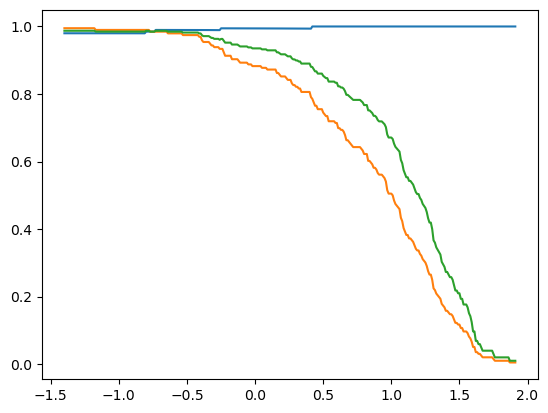

In [46]:
plt.plot(threshold,precision)
plt.plot(threshold,recall)
plt.plot(threshold,F1)

In [47]:
n_results = pd.read_csv('./04_Simulated_result/GP/GP_Criteria_1.csv')
n_results = n_results.iloc[:,1:]
n_results

,Period,SNR,nSNR,LLR,0
0,20.0,4.003015,2.001507,-1.612209,Non-circadian
1,18.0,1.713571,0.856785,-0.998823,Non-circadian
2,24.0,7.206358,2.612281,1.396313,Circadian
3,20.0,2.484985,1.077117,-1.074589,Non-circadian
4,24.0,3.418823,1.233576,0.738312,Circadian
...,...,...,...,...,...
195,20.0,1.585557,0.671242,-1.813082,Non-circadian
196,16.0,1.414794,0.707397,-1.394684,Non-circadian
197,24.0,6.209997,2.646945,0.965695,Circadian
198,22.0,1.376489,0.542946,-1.332465,Non-circadian


In [54]:
# Test with LLR first:
threshold = np.arange(start = n_results['LLR'].min(), stop =  n_results['LLR'].max(), step = 0.01)
#cnd = list(s_results['0'])
#cnd = [int(u in 'Circadian') for u in cnd]
precision = []
recall = []
F1 = []
for x in threshold:
    llr = list(n_results['LLR'])
    A_R = [int(u > x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(n_results)):
        if (n_results['Period'][j] == 24) & (n_results['0'][j] == 'Circadian'):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(n_results)):
        if (n_results['Period'][j] != 24) & (n_results['0'][j] == 'Non-circadian'):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(n_results)):
        if (n_results['Period'][j] == 24) & (n_results['0'][j] == 'Circadian'):
            if A_R[j] != 1:
                FN += 1
    precision.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))

for z in range(len(precision)):
    F1.append(2*(precision[z]*recall[z])/(precision[z]+recall[z]))

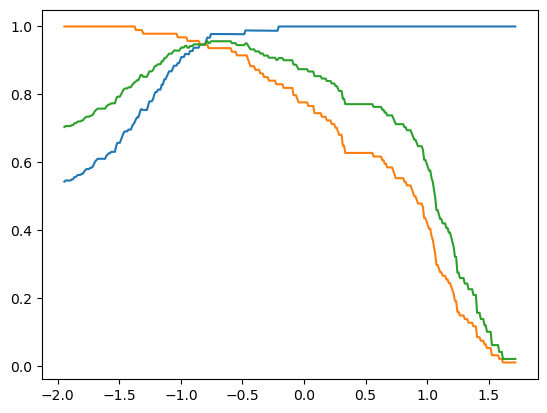

In [55]:
plt.plot(threshold,precision)
plt.plot(threshold,recall)
plt.plot(threshold,F1)

In [50]:
k_results = pd.read_csv('./04_Simulated_result/GP/GP_Criteria_3.csv')
k_results = k_results.iloc[:,1:]
k_results

,Period,SNR,nSNR,LLR,0
0,12.0,1.967661,0.983830,-1.167073,0.138315
1,12.0,2.627041,1.313521,-1.479932,0.102503
2,24.0,20.329548,7.897790,1.951474,0.000322
3,24.0,3.475793,1.211819,-0.918583,0.078700
4,24.0,17.106647,5.943537,1.460580,0.002262
...,...,...,...,...,...
195,24.0,4.226267,1.747322,0.910209,0.039929
196,24.0,3.129942,0.945366,-1.514136,0.218345
197,16.0,4.926677,2.463338,-1.517291,0.114758
198,12.0,1.619847,0.809923,-1.603860,0.225787


In [56]:
# Test with LLR first:
threshold = np.arange(start = k_results['LLR'].min(), stop =  k_results['LLR'].max(), step = 0.01)
#cnd = list(s_results['0'])
#cnd = [int(u in 'Circadian') for u in cnd]
precision = []
recall = []
F1 = []
for x in threshold:
    llr = list(k_results['LLR'])
    A_R = [int(u > x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(k_results)):
        if (k_results['Period'][j] == 24):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(k_results)):
        if (k_results['Period'][j] != 24):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(k_results)):
        if (k_results['Period'][j] == 24):
            if A_R[j] != 1:
                FN += 1
    precision.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))

for z in range(len(precision)):
    F1.append(2*(precision[z]*recall[z])/(precision[z]+recall[z]))

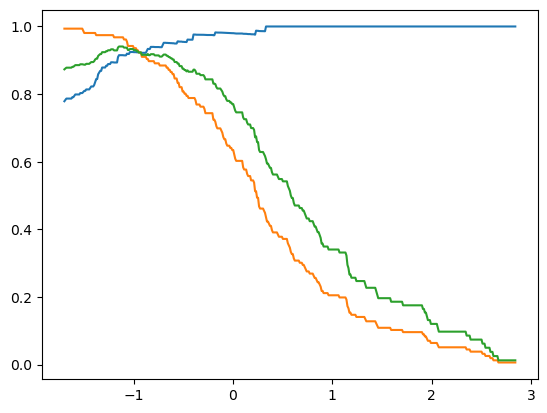

In [57]:
plt.plot(threshold,precision)
plt.plot(threshold,recall)
plt.plot(threshold,F1)

In [66]:
# Test with SNR
# Test with LLR first:
threshold = np.arange(start = s_results['nSNR'].min(), stop =  s_results['nSNR'].max(), step = 0.01)
#cnd = list(s_results['0'])
#cnd = [int(u in 'Circadian') for u in cnd]
precision = []
recall = []
F1 = []
for x in threshold:
    llr = list(s_results['nSNR'])
    A_R = [int(u > x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(s_results)):
        if s_results['Period'][j] == s_results['0'][j]:
            if A_R[j] == 1:
                TP +=1
    for j in range(len(s_results)):
        if s_results['Period'][j] != s_results['0'][j]:
            if A_R[j] == 1:
                FP += 1
    for j in range(len(s_results)):
        if s_results['Period'][j] == s_results['0'][j]:
            if A_R[j] != 1:
                FN += 1
    precision.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))

for z in range(len(precision)):
    F1.append(2*(precision[z]*recall[z])/(precision[z]+recall[z]))

In [68]:
# Test with LLR first:
threshold = np.arange(start = n_results['nSNR'].min(), stop =  n_results['nSNR'].max(), step = 0.01)
#cnd = list(s_results['0'])
#cnd = [int(u in 'Circadian') for u in cnd]
precision = []
recall = []
F1 = []
for x in threshold:
    llr = list(n_results['nSNR'])
    A_R = [int(u > x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(n_results)):
        if (n_results['Period'][j] == 24) & (n_results['0'][j] == 'Circadian'):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(n_results)):
        if (n_results['Period'][j] != 24) & (n_results['0'][j] == 'Non-circadian'):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(n_results)):
        if (n_results['Period'][j] == 24) & (n_results['0'][j] == 'Circadian'):
            if A_R[j] != 1:
                FN += 1
    precision.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))

for z in range(len(precision)):
    F1.append(2*(precision[z]*recall[z])/(precision[z]+recall[z]))

In [73]:
# Test with LLR first:
threshold = np.arange(start = k_results['nSNR'].min(), stop =  k_results['nSNR'].max(), step = 0.01)
#cnd = list(s_results['0'])
#cnd = [int(u in 'Circadian') for u in cnd]
precision = []
recall = []
F1 = []
for x in threshold:
    llr = list(k_results['nSNR'])
    A_R = [int(u > x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(k_results)):
        if (k_results['Period'][j] == 24):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(k_results)):
        if (k_results['Period'][j] != 24):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(k_results)):
        if (k_results['Period'][j] == 24):
            if A_R[j] != 1:
                FN += 1
    precision.append(TP/(TP+FP))
    recall.append(TP/(TP+FN))

for z in range(len(precision)):
    F1.append(2*(precision[z]*recall[z])/(precision[z]+recall[z]))

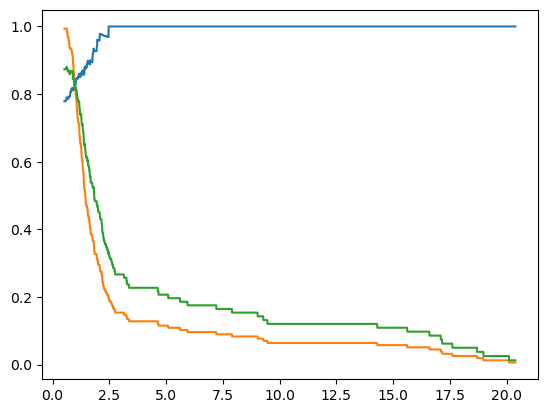

In [74]:
plt.plot(threshold,precision)
plt.plot(threshold,recall)
plt.plot(threshold,F1)